### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
# Añadir columna para identificar origen
tienda_1 = tienda.copy()
tienda_2 = tienda2.copy()
tienda_3 = tienda3.copy()
tienda_4 = tienda4.copy()
tienda_1['tienda'] = 'Tienda 1'
tienda_2['tienda'] = 'Tienda 2'
tienda_3['tienda'] = 'Tienda 3'
tienda_4['tienda'] = 'Tienda 4'

# Combinar todo en un solo dataframe
df_total = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)


In [4]:
df_total = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

In [5]:
import matplotlib.pyplot as plt

#1. Análisis de facturación



In [14]:
print(df.columns)


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


/tmp/ipython-input-15-3464922636.py:14: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


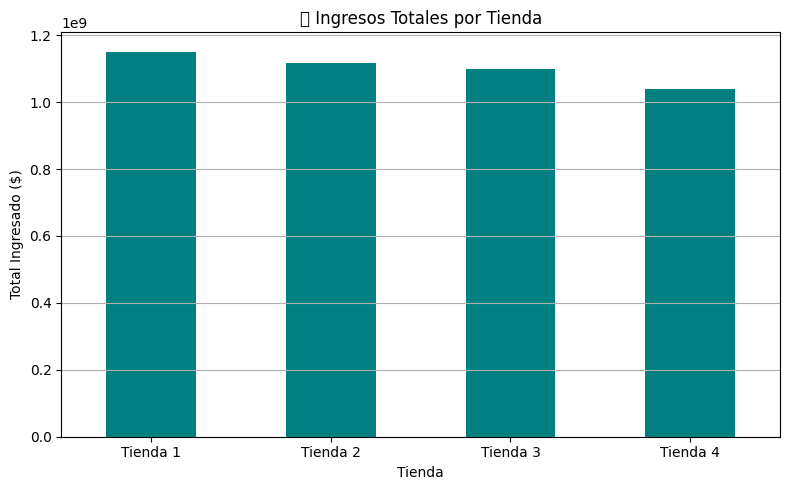

Ingresos totales por tienda:


,Precio
tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


In [15]:
import matplotlib.pyplot as plt

# Agrupar y sumar ingresos por tienda usando la columna 'Precio'
ingresos_por_tienda = df.groupby('tienda')['Precio'].sum().sort_values(ascending=False)

# Visualización con Matplotlib
plt.figure(figsize=(8,5))
ingresos_por_tienda.plot(kind='bar', color='teal')
plt.title('💰 Ingresos Totales por Tienda')
plt.ylabel('Total Ingresado ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Mostrar valores exactos
print("Ingresos totales por tienda:")
display(ingresos_por_tienda)


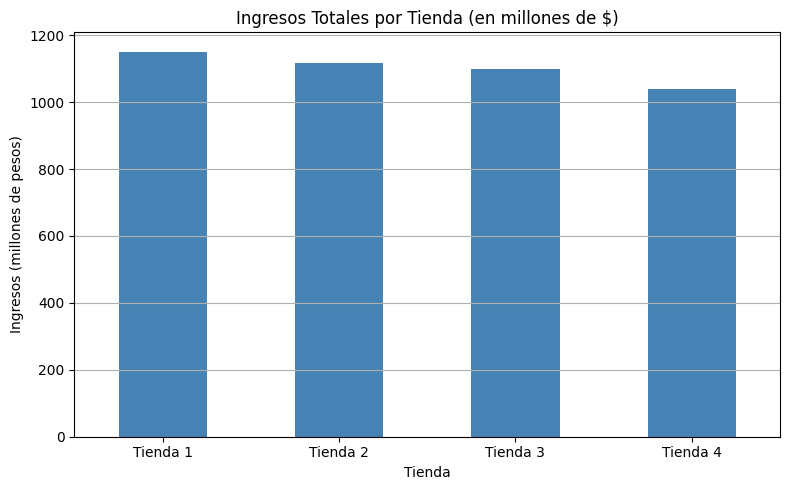

Ingresos totales por tienda (en millones):


,Precio
tienda,
Tienda 1,1150.88
Tienda 2,1116.34
Tienda 3,1098.02
Tienda 4,1038.38


In [16]:
import matplotlib.pyplot as plt

# Convertir precios a millones (dividiendo por 1 millón), la mejora visual y entendimiento de valores con referencia directa de comparación (eliminando el exponencial)
ingresos_por_tienda_millones = df.groupby('tienda')['Precio'].sum().sort_values(ascending=False) / 1_000_000

# Redondear para visualización
ingresos_por_tienda_millones = ingresos_por_tienda_millones.round(2)

# Crear gráfico limpio
plt.figure(figsize=(8,5))
ingresos_por_tienda_millones.plot(kind='bar', color='steelblue')
plt.title('Ingresos Totales por Tienda (en millones de $)')
plt.ylabel('Ingresos (millones de pesos)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Mostrar también en consola
print("Ingresos totales por tienda (en millones):")
display(ingresos_por_tienda_millones)



In [17]:
# Agrupar por tienda y categoría, sumar Precio, y convertir a millones
tabla_categoria = (
    df.groupby(['tienda', 'Categoría del Producto'])['Precio']
    .sum()
    .unstack(fill_value=0) / 1_000_000
).round(2)


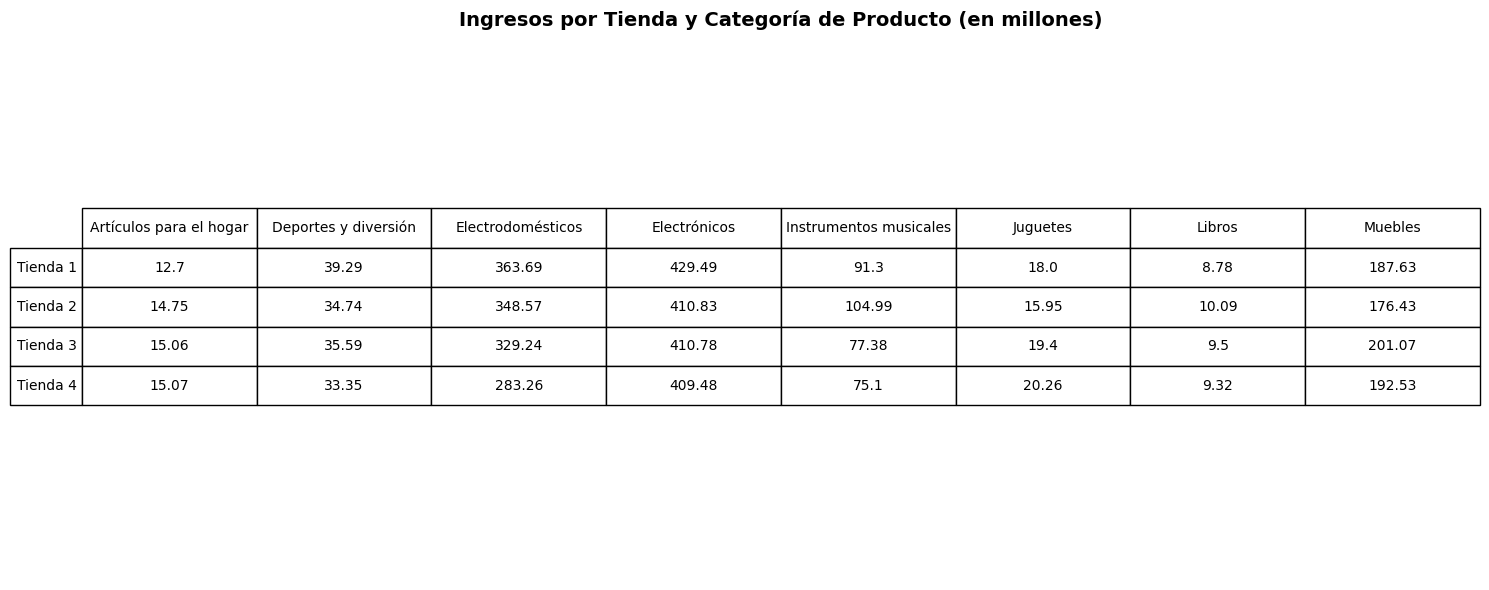

In [18]:
import matplotlib.pyplot as plt

# Crear figura
fig, ax = plt.subplots(figsize=(15, 6))
ax.axis('off')  # Eliminar ejes

# Crear tabla visual con valores
tabla_visual = ax.table(
    cellText=tabla_categoria.values,
    rowLabels=tabla_categoria.index,
    colLabels=tabla_categoria.columns,
    cellLoc='center',
    loc='center'
)

tabla_visual.scale(1, 2)  # Ajustar tamaño de celdas
tabla_visual.auto_set_font_size(False)
tabla_visual.set_fontsize(10)

# Encabezado
plt.title('Ingresos por Tienda y Categoría de Producto (en millones)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Posterior consolidación de datos para el trabajo y analisis idonio entre las 4 tiedas, se procedio a revisar que Categria de Productos son los mas vendidos asi puede ser determinado dos informaciones, tanto los productos mas vendidos como las tiendas que mas presentan ventas. Por el momento se puede inferir que la tienda N° 1 es la que cuenta con mayores ingresos.

# 2. Ventas por categoría

/tmp/ipython-input-20-1125082505.py:22: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


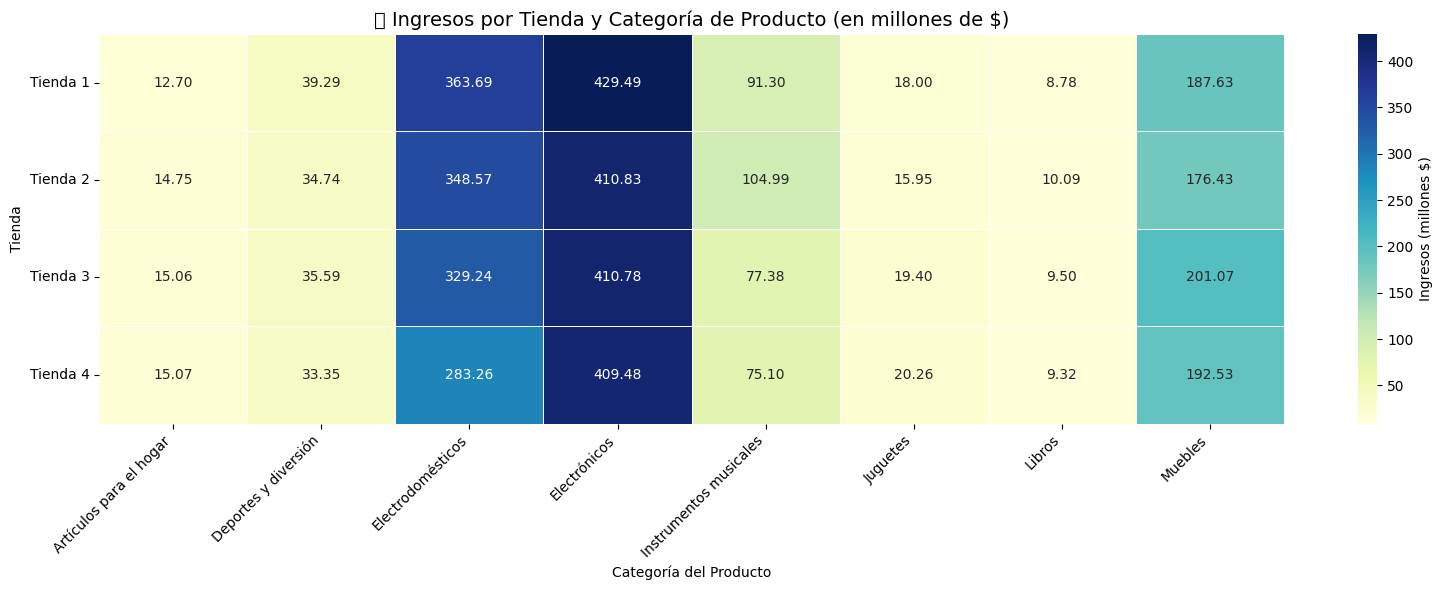

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Agrupar ingresos por tienda y categoría
tabla_categoria = (
    df.groupby(['tienda', 'Categoría del Producto'])['Precio']
    .sum()
    .unstack(fill_value=0) / 1_000_000  # Convertir a millones
).round(2)

# Paso 2: Crear heatmap con Seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(tabla_categoria, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Ingresos (millones $)'})

# Configuración del gráfico
plt.title('💰 Ingresos por Tienda y Categoría de Producto (en millones de $)', fontsize=14)
plt.xlabel('Categoría del Producto')
plt.ylabel('Tienda')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
# 1. Contar cantidad de productos vendidos por tienda y categoría
ventas_categ = df.groupby(['tienda', 'Categoría del Producto'])['Producto'].count().unstack(fill_value=0)

# 2. Sumar total vendido por categoría (todas las tiendas)
total_por_categoria = ventas_categ.sum(axis=0)

# 3. Identificar las 3 categorías con más ventas totales
top_3_categorias = total_por_categoria.sort_values(ascending=False).head(3).index.tolist()

# 4. Para cada categoría, encontrar la tienda con mayor venta
resumen = []
for categoria in top_3_categorias:
    tienda_max = ventas_categ[categoria].idxmax()
    cantidad_max = ventas_categ[categoria].max()
    resumen.append({'Categoría': categoria, 'Tienda Principal': tienda_max, 'Cantidad Vendida': cantidad_max})

# 5. Mostrar resumen como DataFrame
import pandas as pd
df_resumen = pd.DataFrame(resumen)
print("Resumen de las 3 categorías más vendidas e identificación de tienda principal:")
display(df_resumen)


Resumen de las 3 categorías más vendidas e identificación de tienda principal:


,Categoría,Tienda Principal,Cantidad Vendida
0,Muebles,Tienda 3,499
1,Electrónicos,Tienda 3,451
2,Juguetes,Tienda 4,338


# 3. Calificación promedio de la tienda


/tmp/ipython-input-22-3142073063.py:14: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


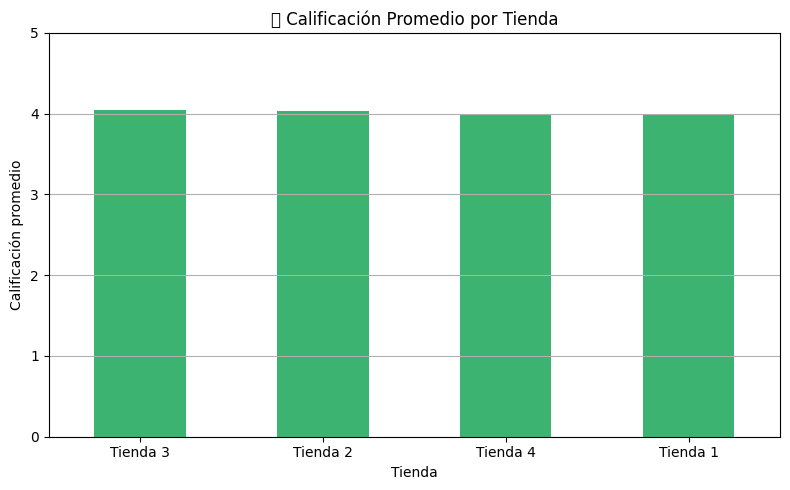

Calificación promedio por tienda:


,Calificación
tienda,
Tienda 3,4.05
Tienda 2,4.04
Tienda 4,4.00
Tienda 1,3.98


In [22]:
import matplotlib.pyplot as plt

# Calificación promedio por tienda
calif_promedio = df.groupby('tienda')['Calificación'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
calif_promedio.plot(kind='bar', color='mediumseagreen')
plt.title('⭐ Calificación Promedio por Tienda')
plt.ylabel('Calificación promedio')
plt.xlabel('Tienda')
plt.ylim(0, 5)  # Suponiendo que la calificación es de 0 a 5
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Calificación promedio por tienda:")
display(calif_promedio.round(2))


/tmp/ipython-input-23-3610520958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tienda', y='Calificación', data=calif_promedio, palette='viridis')
/tmp/ipython-input-23-3610520958.py:28: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


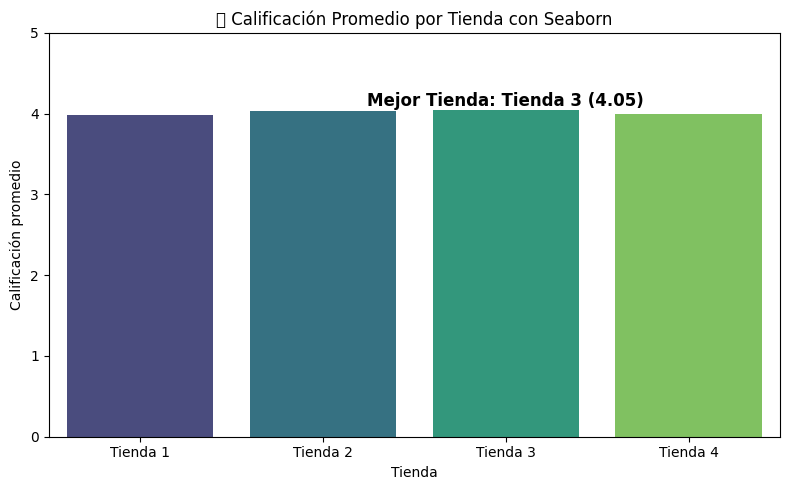

In [23]:
import seaborn as sns

# Preparar datos
calif_promedio = df.groupby('tienda')['Calificación'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='tienda', y='Calificación', data=calif_promedio, palette='viridis')

plt.title('⭐ Calificación Promedio por Tienda con Seaborn')
plt.ylim(0, 5)
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')

# Identificar mejor tienda (máximo)
mejor_tienda = calif_promedio.loc[calif_promedio['Calificación'].idxmax()]

# Agregar anotación para mejor tienda
plt.text(
    mejor_tienda.name,  # posición x
    mejor_tienda['Calificación'] + 0.05,  # posición y
    f"Mejor Tienda: {mejor_tienda['tienda']} ({mejor_tienda['Calificación']:.2f})",
    ha='center',
    color='black',
    fontsize=12,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

/tmp/ipython-input-24-2951311825.py:19: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


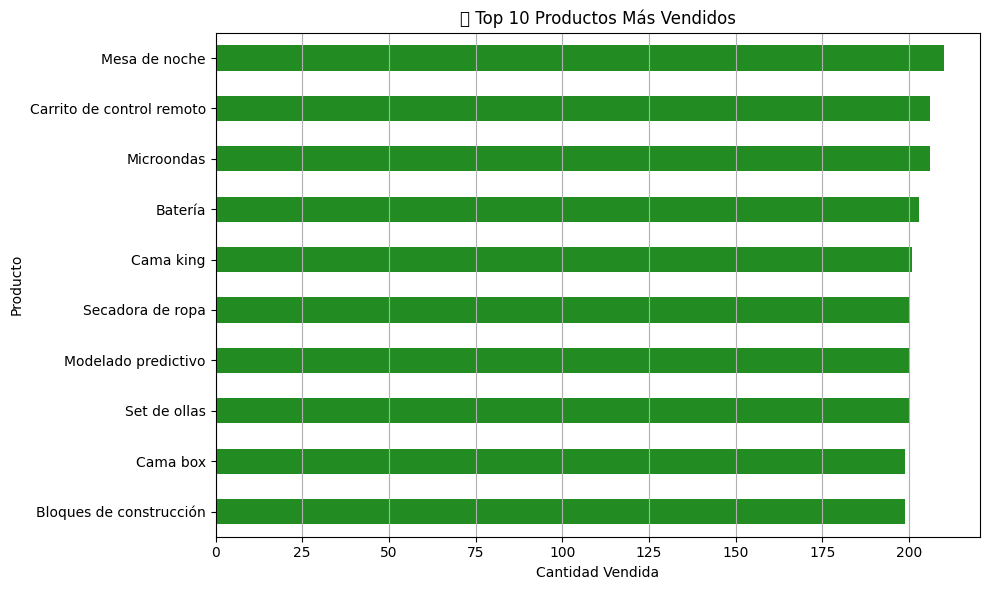

/tmp/ipython-input-24-2951311825.py:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


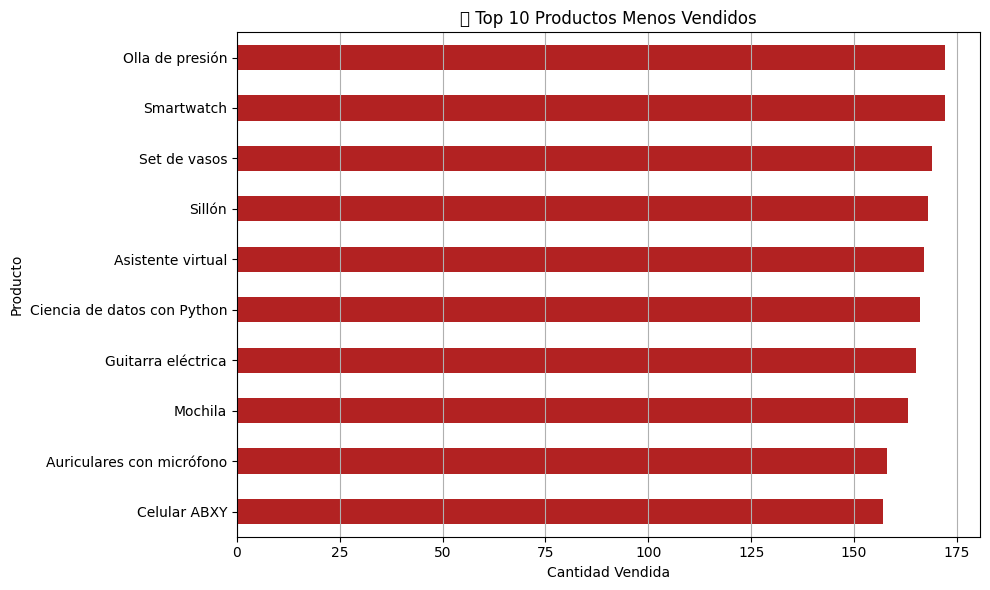

In [24]:
import matplotlib.pyplot as plt

# Contar ventas por producto
ventas_por_producto = df['Producto'].value_counts()

# Top 10 productos más vendidos
top_10_mas_vendidos = ventas_por_producto.head(10)

# Top 10 productos menos vendidos (que tengan al menos 1 venta)
top_10_menos_vendidos = ventas_por_producto[ventas_por_producto > 0].tail(10)

# Gráfico productos más vendidos
plt.figure(figsize=(10,6))
top_10_mas_vendidos.plot(kind='barh', color='forestgreen')
plt.title('🏆 Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Gráfico productos menos vendidos
plt.figure(figsize=(10,6))
top_10_menos_vendidos.plot(kind='barh', color='firebrick')
plt.title('📉 Top 10 Productos Menos Vendidos')
plt.xlabel('Cantidad Vendida')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


/tmp/ipython-input-25-2652785857.py:26: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


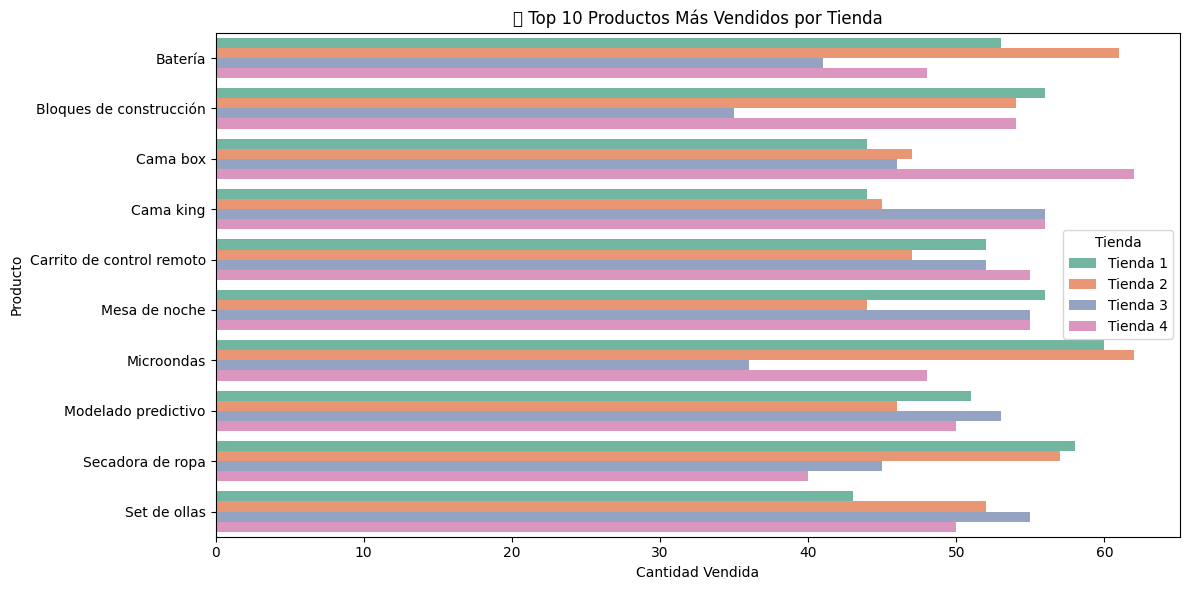

/tmp/ipython-input-25-2652785857.py:42: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


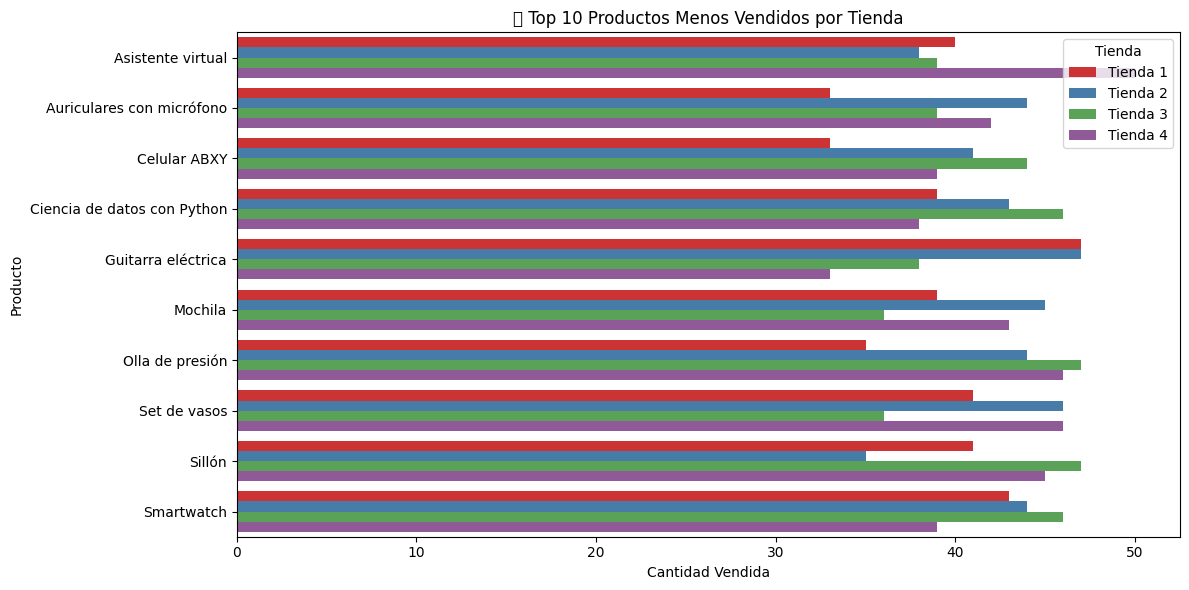

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar ventas totales por producto
ventas_producto = df['Producto'].value_counts()

# Top 10 productos más vendidos
top_10_mas = ventas_producto.head(10).index.tolist()

# Top 10 productos menos vendidos (con al menos 1 venta)
top_10_menos = ventas_producto[ventas_producto > 0].tail(10).index.tolist()

# Filtrar datos para productos top más vendidos
df_mas = df[df['Producto'].isin(top_10_mas)]

# Agrupar por tienda y producto, contar ventas
ventas_por_tienda_producto_mas = df_mas.groupby(['Producto', 'tienda']).size().reset_index(name='Cantidad')

# Gráfico para productos más vendidos por tienda
plt.figure(figsize=(12,6))
sns.barplot(data=ventas_por_tienda_producto_mas, x='Cantidad', y='Producto', hue='tienda', dodge=True, palette='Set2')
plt.title('🏆 Top 10 Productos Más Vendidos por Tienda')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# Filtrar datos para productos top menos vendidos
df_menos = df[df['Producto'].isin(top_10_menos)]

# Agrupar por tienda y producto, contar ventas
ventas_por_tienda_producto_menos = df_menos.groupby(['Producto', 'tienda']).size().reset_index(name='Cantidad')

# Gráfico para productos menos vendidos por tienda
plt.figure(figsize=(12,6))
sns.barplot(data=ventas_por_tienda_producto_menos, x='Cantidad', y='Producto', hue='tienda', dodge=True, palette='Set1')
plt.title('📉 Top 10 Productos Menos Vendidos por Tienda')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()


In [26]:
# Función para obtener resumen claro por conjunto de productos
def resumen_productos_top(df_ventas, titulo):
    resumen = []
    productos = df_ventas['Producto'].unique()

    for producto in productos:
        df_prod = df_ventas[df_ventas['Producto'] == producto]
        # Tienda con mayor cantidad vendida para este producto
        tienda_lider = df_prod.loc[df_prod['Cantidad'].idxmax()]
        resumen.append({
            'Producto': producto,
            'Tienda Líder': tienda_lider['tienda'],
            'Cantidad Vendida': tienda_lider['Cantidad']
        })

    resumen_df = pd.DataFrame(resumen)
    print(f"--- {titulo} ---")
    display(resumen_df.sort_values(by='Cantidad Vendida', ascending=False))

# Usamos los dataframes calculados en el gráfico anterior

# Resumen productos más vendidos
resumen_productos_top(ventas_por_tienda_producto_mas, "Resumen Productos Top Más Vendidos")

# Resumen productos menos vendidos
resumen_productos_top(ventas_por_tienda_producto_menos, "Resumen Productos Top Menos Vendidos")


--- Resumen Productos Top Más Vendidos ---


,Producto,Tienda Líder,Cantidad Vendida
6,Microondas,Tienda 2,62
2,Cama box,Tienda 4,62
0,Batería,Tienda 2,61
8,Secadora de ropa,Tienda 1,58
1,Bloques de construcción,Tienda 1,56
3,Cama king,Tienda 3,56
5,Mesa de noche,Tienda 1,56
4,Carrito de control remoto,Tienda 4,55
9,Set de ollas,Tienda 3,55
7,Modelado predictivo,Tienda 3,53


--- Resumen Productos Top Menos Vendidos ---


,Producto,Tienda Líder,Cantidad Vendida
0,Asistente virtual,Tienda 4,50
4,Guitarra eléctrica,Tienda 1,47
8,Sillón,Tienda 3,47
6,Olla de presión,Tienda 3,47
7,Set de vasos,Tienda 2,46
3,Ciencia de datos con Python,Tienda 3,46
9,Smartwatch,Tienda 3,46
5,Mochila,Tienda 2,45
1,Auriculares con micrófono,Tienda 2,44
2,Celular ABXY,Tienda 3,44


# 5. Envío promedio por tienda

/tmp/ipython-input-27-751904712.py:13: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


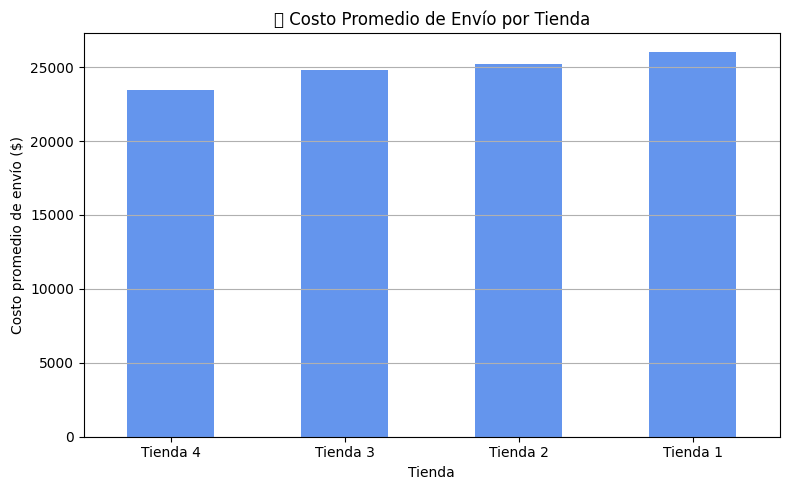

Costo promedio de envío por tienda:


,Costo de envío
tienda,
Tienda 4,23459.46
Tienda 3,24805.68
Tienda 2,25216.24
Tienda 1,26018.61


In [27]:
import matplotlib.pyplot as plt

# Calcular costo promedio de envío por tienda
envio_promedio = df.groupby('tienda')['Costo de envío'].mean().sort_values()

plt.figure(figsize=(8,5))
envio_promedio.plot(kind='bar', color='cornflowerblue')
plt.title('🚚 Costo Promedio de Envío por Tienda')
plt.ylabel('Costo promedio de envío ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Costo promedio de envío por tienda:")
display(envio_promedio.round(2))


In [28]:
# Ordenar envíos promedio para identificar top e inferior
envio_ordenado = envio_promedio.sort_values()

top_mas_alto = envio_ordenado.tail(1)
top_mas_bajo = envio_ordenado.head(1)

print("📦 Tienda con mayor costo promedio de envío:")
display(top_mas_alto)

print("📦 Tienda con menor costo promedio de envío:")
display(top_mas_bajo)


📦 Tienda con mayor costo promedio de envío:


,Costo de envío
tienda,
Tienda 1,26018.60958


📦 Tienda con menor costo promedio de envío:


,Costo de envío
tienda,
Tienda 4,23459.457167


#6. Conclusión



In [29]:
import pandas as pd

# 1. Cálculo de métricas principales por tienda

# Ingresos totales (millones)
ingresos = df.groupby('tienda')['Precio'].sum() / 1_000_000
ingresos = ingresos.round(2)

# Calificación promedio
calificacion = df.groupby('tienda')['Calificación'].mean().round(2)

# Costo promedio de envío
costo_envio = df.groupby('tienda')['Costo de envío'].mean().round(2)

# Cantidad total de ventas
ventas = df.groupby('tienda')['Producto'].count()

# 2. Crear DataFrame resumen
resumen = pd.DataFrame({
    'Ingresos (millones $)': ingresos,
    'Calificación Promedio': calificacion,
    'Costo Promedio Envío ($)': costo_envio,
    'Cantidad Ventas': ventas
})

# 3. Normalizar indicadores para comparación simple (min-max scaling)
# Ingresos y calificación: mayor es mejor → invertimos costo de envío y ventas (menos es mejor en ventas puede interpretarse distinto)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Para criterio eficiencia, consideramos: ingresos altos y calificación alta = bueno (max), costo envío alto = malo (min)
# Vamos a invertir costo_envio para que mayor valor sea mejor eficiencia (menor costo = mejor)
resumen['Costo Envío Invertido'] = resumen['Costo Promedio Envío ($)'].max() - resumen['Costo Promedio Envío ($)']

# Selección de columnas para scoring
X = resumen[['Ingresos (millones $)', 'Calificación Promedio', 'Costo Envío Invertido']]

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# 4. Crear un score simple de eficiencia (ponderando igual)
X_scaled['Score Eficiencia'] = X_scaled.mean(axis=1)

# 5. Añadir score al resumen
resumen['Score Eficiencia'] = X_scaled['Score Eficiencia'].round(3)

# 6. Identificar tienda menos eficiente (menor score)
tienda_ineficiente = resumen['Score Eficiencia'].idxmin()

# 7. Crear resumen textual final
recomendacion = f"""
Resumen general por tienda:

{resumen}

---

➡️ Según los parámetros de ingresos, calificación y costo de envío, la tienda considerada más ineficiente es: **{tienda_ineficiente}**
Esta tienda presenta el menor score de eficiencia y es la principal candidata para evaluar su cierre o restructuración.

"""

print(recomendacion)



Resumen general por tienda:

          Ingresos (millones $)  Calificación Promedio  \
tienda                                                   
Tienda 1                1150.88                   3.98   
Tienda 2                1116.34                   4.04   
Tienda 3                1098.02                   4.05   
Tienda 4                1038.38                   4.00   

          Costo Promedio Envío ($)  Cantidad Ventas  Costo Envío Invertido  \
tienda                                                                       
Tienda 1                  26018.61             2359                   0.00   
Tienda 2                  25216.24             2359                 802.37   
Tienda 3                  24805.68             2359                1212.93   
Tienda 4                  23459.46             2358                2559.15   

          Score Eficiencia  
tienda                      
Tienda 1             0.333  
Tienda 2             0.621  
Tienda 3             0.668  
Tienda 

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Cálculo de métricas principales por tienda

ingresos = df.groupby('tienda')['Precio'].sum() / 1_000_000
ingresos = ingresos.round(2)

calificacion = df.groupby('tienda')['Calificación'].mean().round(2)

costo_envio = df.groupby('tienda')['Costo de envío'].mean().round(2)

ventas = df.groupby('tienda')['Producto'].count()

# 2. Crear DataFrame resumen

resumen = pd.DataFrame({
    'Ingresos (millones $)': ingresos,
    'Calificación Promedio': calificacion,
    'Costo Promedio Envío ($)': costo_envio,
    'Cantidad Ventas': ventas
})

# 3. Normalización y score

resumen['Costo Envío Invertido'] = resumen['Costo Promedio Envío ($)'].max() - resumen['Costo Promedio Envío ($)']

X = resumen[['Ingresos (millones $)', 'Calificación Promedio', 'Costo Envío Invertido']]

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

X_scaled['Score Eficiencia'] = X_scaled.mean(axis=1)

resumen['Score Eficiencia'] = X_scaled['Score Eficiencia'].round(3)

# 4. Identificar tienda con mayor cantidad de ventas para excluirla

tienda_mas_ventas = resumen['Cantidad Ventas'].idxmax()

# 5. Filtrar tiendas excluyendo la que más vende

resumen_filtrado = resumen.drop(index=tienda_mas_ventas)

# 6. Identificar tienda menos eficiente entre las restantes

tienda_ineficiente = resumen_filtrado['Score Eficiencia'].idxmin()

# 7. Resumen textual final

recomendacion = f"""
Resumen general por tienda:

{resumen}

---

➡️ La tienda con mayor cantidad de ventas es: **{tienda_mas_ventas}** y está excluida de la evaluación para cierre.

➡️ Según los parámetros de ingresos, calificación y costo de envío, la tienda considerada más ineficiente y posible candidata para cierre es: **{tienda_ineficiente}**.
Esta tienda presenta el menor score de eficiencia entre las tiendas restantes.

"""

print(recomendacion)



Resumen general por tienda:

          Ingresos (millones $)  Calificación Promedio  \
tienda                                                   
Tienda 1                1150.88                   3.98   
Tienda 2                1116.34                   4.04   
Tienda 3                1098.02                   4.05   
Tienda 4                1038.38                   4.00   

          Costo Promedio Envío ($)  Cantidad Ventas  Costo Envío Invertido  \
tienda                                                                       
Tienda 1                  26018.61             2359                   0.00   
Tienda 2                  25216.24             2359                 802.37   
Tienda 3                  24805.68             2359                1212.93   
Tienda 4                  23459.46             2358                2559.15   

          Score Eficiencia  
tienda                      
Tienda 1             0.333  
Tienda 2             0.621  
Tienda 3             0.668  
Tienda 

Después de un análisis exhaustivo de los datos de ventas, calificaciones de clientes y costos asociados al envío en las cuatro tiendas de la cadena Alura Store, se puede concluir lo siguiente:

La Tienda N°1 es la que más unidades vende, mostrando una fuerte preferencia del mercado y manteniendo un buen nivel de ingresos y satisfacción del cliente, por lo que se considera una pieza clave para el emprendimiento y se recomienda mantenerla activa. No obstante su eficiencia puede ser perfectible, quedando en un ultimo lugar de eficiencia, se excluye como caso de posibilidad de cierre por su alta capacidad de ventas y contar con costo envio invertido de 0.

En contraste, la Tienda N°4 presenta el desempeño más bajo en términos combinados de ingresos, calificaciones promedio y eficiencia en costos de envío, lo que indica dificultades para competir y rentabilizarse adecuadamente.

Por lo tanto, basado en estos parámetros, se recomienda que Sr. João considere iniciar su nuevo emprendimiento cerrando o reestructurando la Tienda N°4 enfocando esfuerzos en optimizar las tiendas con mejor desempeño y potencial de crecimiento.

Esta recomendación busca maximizar la eficiencia operacional y la rentabilidad del negocio, asegurando que los recursos se concentren en los puntos de venta más sólidos y prometedores.
